<a href="https://colab.research.google.com/github/bhopchi/Parkinsons-Disease-Detection-using-Inception-and-Xception-with-Attention-Mechanism.ipynb/blob/main/Parkinsons_Disease_Detection_using_Inception_and_Xception_with_Attention_Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import zipfile

def extract_zip(zip_file_path, extract_path):
  """
  Extracts a zip file to the specified path.

  Args:
    zip_file_path: The path to the zip file.
    extract_path: The path where the zip file should be extracted.
  """
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Example usage
zip_file_path = '/content/archive (4).zip'  # Replace with your zip file path
extract_path = '/content/extracted_files'  # Replace with your desired extraction path
extract_zip(zip_file_path, extract_path)

print(f"Zip file extracted to: {extract_path}")

Zip file extracted to: /content/extracted_files


In [7]:
healthy_path = '/content/extracted_files/spiral/training/healthy'
parkinson_path = '/content/extracted_files/spiral/training/parkinson'

In [8]:
data = []

for file in os.listdir(healthy_path):
    if file.endswith(".png") or file.endswith(".jpg"):
        data.append([os.path.join(healthy_path, file), 'healthy'])

for file in os.listdir(parkinson_path):
    if file.endswith(".png") or file.endswith(".jpg"):
        data.append([os.path.join(parkinson_path, file), 'parkinson'])

df = pd.DataFrame(data, columns=['file_path', 'label'])

In [9]:
df.head()

,file_path,label
0,/content/extracted_files/spiral/training/healt...,healthy
1,/content/extracted_files/spiral/training/healt...,healthy
2,/content/extracted_files/spiral/training/healt...,healthy
3,/content/extracted_files/spiral/training/healt...,healthy
4,/content/extracted_files/spiral/training/healt...,healthy


In [10]:
df.tail()

,file_path,label
67,/content/extracted_files/spiral/training/parki...,parkinson
68,/content/extracted_files/spiral/training/parki...,parkinson
69,/content/extracted_files/spiral/training/parki...,parkinson
70,/content/extracted_files/spiral/training/parki...,parkinson
71,/content/extracted_files/spiral/training/parki...,parkinson


In [11]:
df.shape

(72, 2)

In [12]:
df.columns

Index(['file_path', 'label'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  72 non-null     object
 1   label      72 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [14]:
df.nunique()

,0
file_path,72
label,2


In [15]:
df['label'].unique()

array(['healthy', 'parkinson'], dtype=object)

In [16]:
df['label'].value_counts()

,count
label,
healthy,36
parkinson,36


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-18-85827d6e6169>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


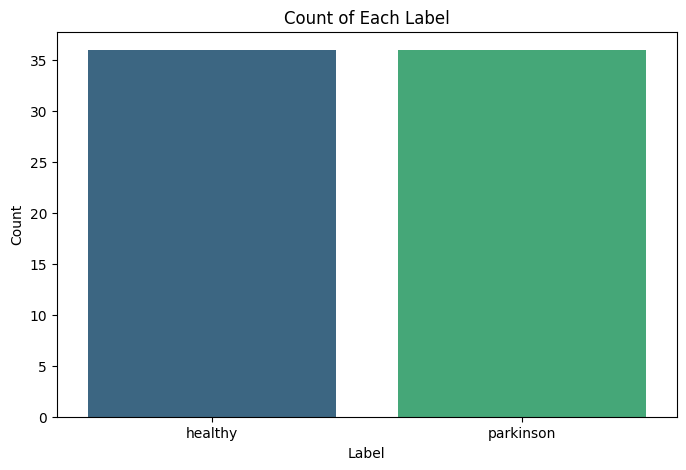

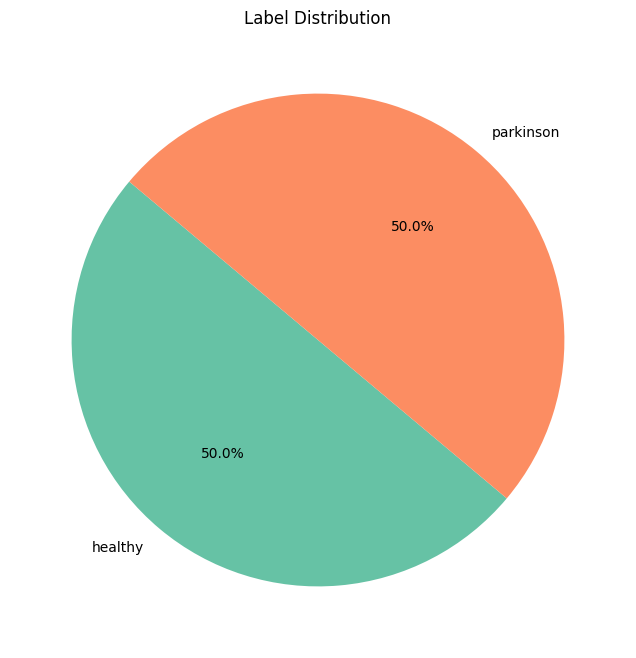

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', palette='viridis')
plt.title("Count of Each Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title("Label Distribution")
plt.ylabel("")
plt.show()

In [19]:
from PIL import Image

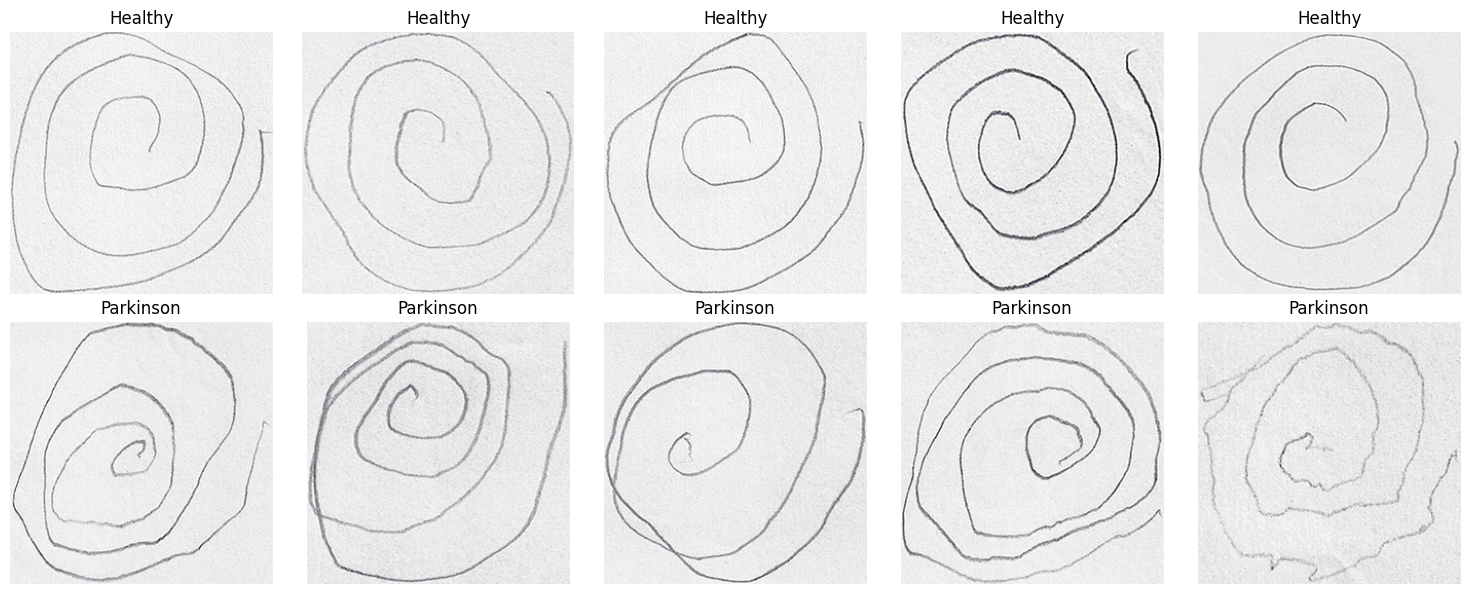

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    img_healthy = Image.open(df[df['label'] == 'healthy'].iloc[i]['file_path'])
    axes[0, i].imshow(img_healthy, cmap='gray')
    axes[0, i].set_title("Healthy")
    axes[0, i].axis('off')

    img_parkinson = Image.open(df[df['label'] == 'parkinson'].iloc[i]['file_path'])
    axes[1, i].imshow(img_parkinson, cmap='gray')
    axes[1, i].set_title("Parkinson")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [21]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [22]:
train_df_new, temp_df_new = train_test_split(
    df,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df['label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label']
)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)


Found 57 validated image filenames belonging to 2 classes.
Found 7 validated image filenames belonging to 2 classes.
Found 8 validated image filenames belonging to 2 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [28]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 7s/step - accuracy: 0.5751 - loss: 0.8215 - val_accuracy: 0.5714 - val_loss: 2.0810
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 379ms/step - accuracy: 0.8955 - loss: 0.2440 - val_accuracy: 0.5714 - val_loss: 1.0724
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 412ms/step - accuracy: 0.8558 - loss: 0.2484 - val_accuracy: 0.5714 - val_loss: 0.9426
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9387 - loss: 0.1542 - val_accuracy: 0.5714 - val_loss: 1.1582
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9331 - loss: 0.1822 - val_accuracy: 0.5714 - val_loss: 1.8423
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9219 - loss: 0.1113 - val_accuracy: 0.5714 - val_loss: 1.8501
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 1.0000 - loss: 0.0314 - val_accuracy: 0.5714 - val_loss: 1.5304
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9881 - loss: 0.0857 - val_accuracy: 0.5714 - val_loss: 1

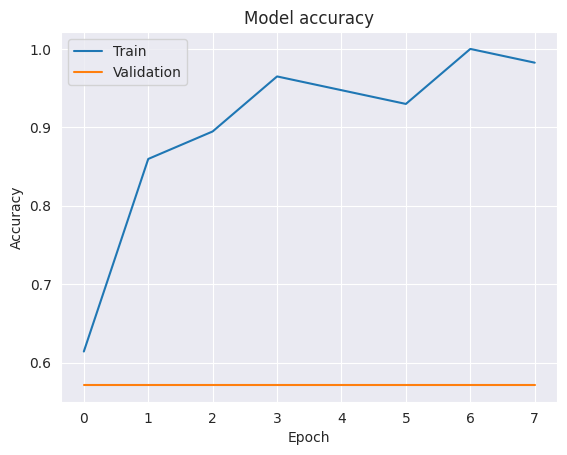

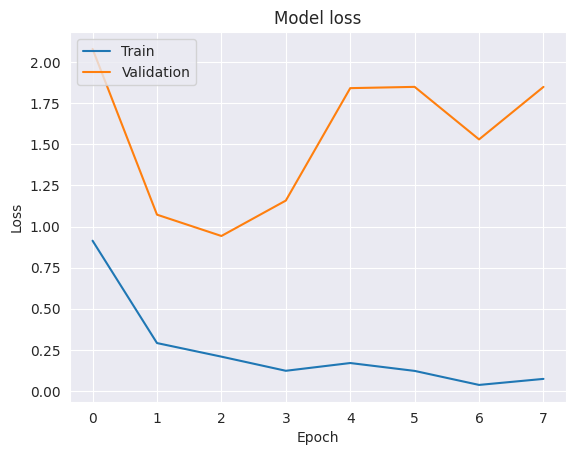

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_labels = (predictions > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [31]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

     healthy       0.50      1.00      0.67         4
   parkinson       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



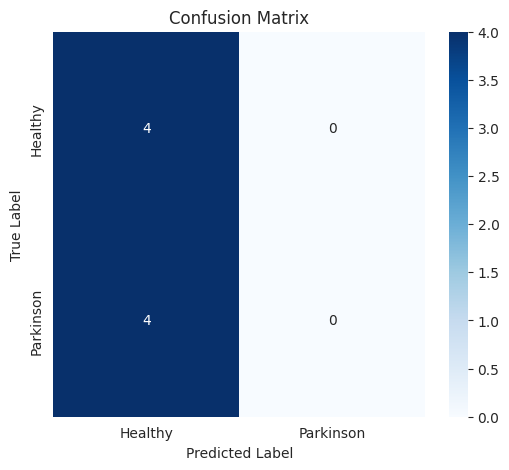

In [32]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [34]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.5737 - loss: 0.7682 - val_accuracy: 0.7143 - val_loss: 0.6714
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 432ms/step - accuracy: 0.7643 - loss: 0.4665 - val_accuracy: 0.5714 - val_loss: 0.6708
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.9017 - loss: 0.2356 - val_accuracy: 0.4286 - val_loss: 0.7283
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.9622 - loss: 0.1509 - val_accuracy: 0.4286 - val_loss: 0.7586
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9573 - loss: 0.1403 - val_accuracy: 0.4286 - val_loss: 0.7249
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 0.9623 - loss: 0.1423 - val_accuracy: 0.7143 - val_loss: 0.6679
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.8292 - loss: 0.3628 - val_accuracy: 0.4286 - val_loss: 0.6825
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9630 - loss: 0.1139 - val_accuracy: 0.4286 - val_loss: 

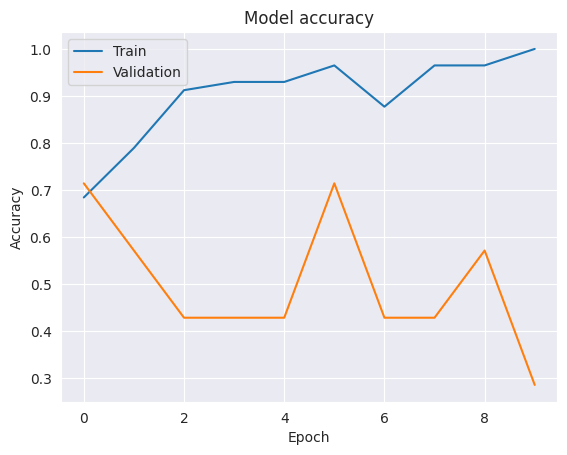

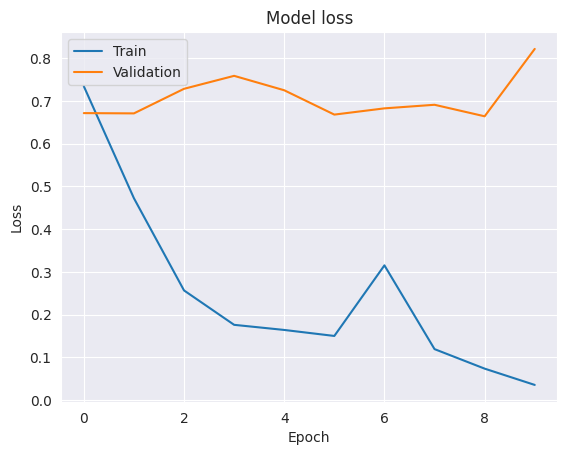

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_labels = (predictions > 0.5).astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [37]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

     healthy       1.00      0.75      0.86         4
   parkinson       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



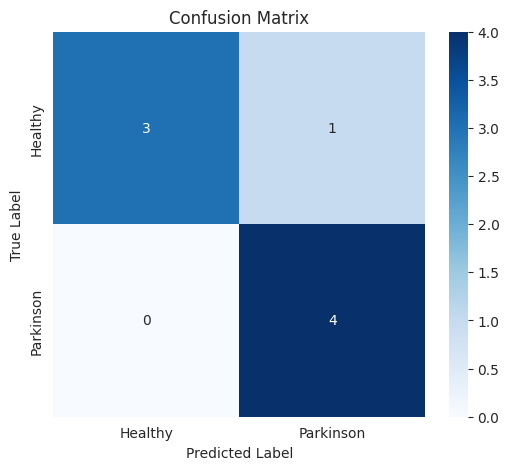

In [38]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

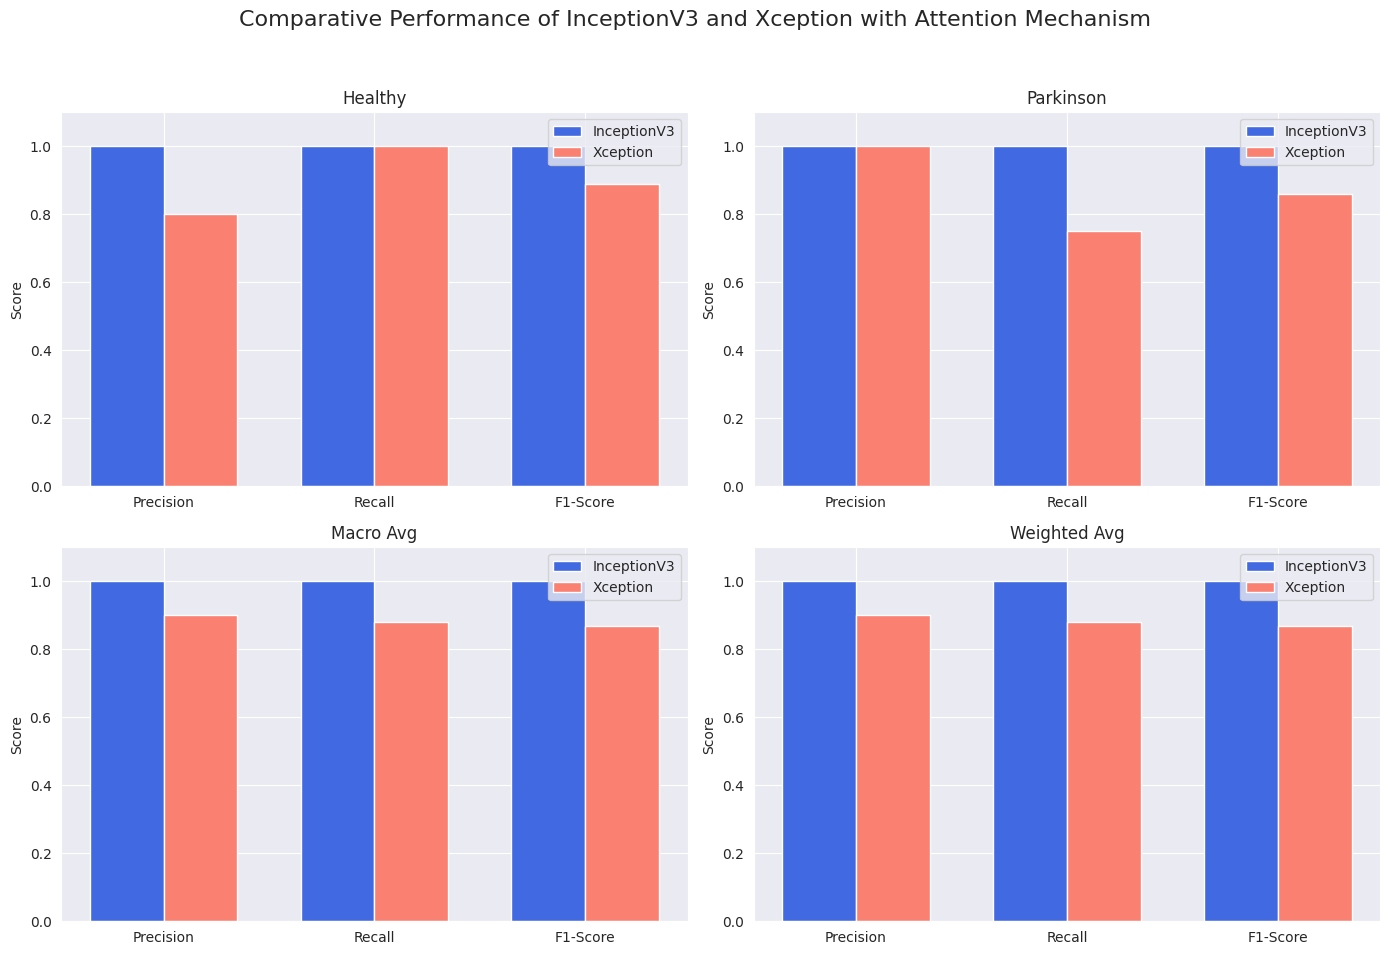

In [39]:
metrics = ["Precision", "Recall", "F1-Score"]
labels = ["Healthy", "Parkinson", "Macro Avg", "Weighted Avg"]

inceptionv3_scores = {
    "Healthy": [1.00, 1.00, 1.00],
    "Parkinson": [1.00, 1.00, 1.00],
    "Macro Avg": [1.00, 1.00, 1.00],
    "Weighted Avg": [1.00, 1.00, 1.00]
}

xception_scores = {
    "Healthy": [0.80, 1.00, 0.89],
    "Parkinson": [1.00, 0.75, 0.86],
    "Macro Avg": [0.90, 0.88, 0.87],
    "Weighted Avg": [0.90, 0.88, 0.87]
}

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Comparative Performance of InceptionV3 and Xception with Attention Mechanism", fontsize=16)

for i, label in enumerate(labels):
    row, col = divmod(i, 2)
    ax[row, col].bar(x - width / 2, inceptionv3_scores[label], width, label="InceptionV3", color='royalblue')
    ax[row, col].bar(x + width / 2, xception_scores[label], width, label="Xception", color='salmon')
    ax[row, col].set_title(label)
    ax[row, col].set_xticks(x)
    ax[row, col].set_xticklabels(metrics)
    ax[row, col].set_ylim([0, 1.1])
    ax[row, col].legend()
    ax[row, col].set_ylabel("Score")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()